## Machine Learning and Cluster Analysis Models to Predict for Incidences of Cardiovascular Disease:

##Information 
age (in number of days)

gender (1 for women, 2 for men)

height (in cm) -> inches

weight (in kg) -> lbs 

aphi (systolic blood pressure)

aplo (diastolic blood pressure)

cholesterol (1 for normal, 2 for above normal, 3 for well above normal)

gluc (glucose levels, 1 for normal, 2 for above normal, 3 for well above normal)

smoke (whether or not the individual smokes)

alco (whether or not the person consumes alcohol, 0 or 1)

active (whether person engages in some form of physical activity)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf 
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV 
from sklearn.metrics import confusion_matrix, roc_curve, auc 
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
#import graphviz
from sklearn.model_selection import train_test_split, cross_val_score
from io import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix,classification_report, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from google.colab import files

In [ ]:
!git clone https://github.com/htran7-uw/656FinalProject.git

fatal: destination path '656FinalProject' already exists and is not an empty directory.


In [ ]:
sample_submission = pd.read_csv('656FinalProject/sample_submission.csv')
cardio_test = pd.read_csv('656FinalProject/test.csv', index_col = 0)
cardio_train = pd.read_csv('656FinalProject/train.csv')

## Data Exploration

In [ ]:
cardio_train.shape

(4000, 12)

In [ ]:
cardio_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          4000 non-null   int64  
 1   gender       4000 non-null   int64  
 2   height       4000 non-null   int64  
 3   weight       4000 non-null   float64
 4   ap_hi        4000 non-null   int64  
 5   ap_lo        4000 non-null   int64  
 6   cholesterol  4000 non-null   int64  
 7   gluc         4000 non-null   int64  
 8   smoke        4000 non-null   int64  
 9   alco         4000 non-null   int64  
 10  active       4000 non-null   int64  
 11  cardio       4000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 375.1 KB


In [ ]:
cardio_train.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,17363,1,172,89.0,110,70,1,1,0,1,0,0
1,21200,1,168,68.0,110,70,1,1,0,0,1,0
2,17286,1,167,74.0,120,80,1,1,0,0,1,0


In [ ]:
cardio_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1000 non-null   int64  
 1   gender       1000 non-null   int64  
 2   height       1000 non-null   int64  
 3   weight       1000 non-null   float64
 4   ap_hi        1000 non-null   int64  
 5   ap_lo        1000 non-null   int64  
 6   cholesterol  1000 non-null   int64  
 7   gluc         1000 non-null   int64  
 8   smoke        1000 non-null   int64  
 9   alco         1000 non-null   int64  
 10  active       1000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 93.8 KB


In [ ]:
cardio_test.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
id,,,,,,,,,,,
0,16036,1,165,125.0,160,100,1,2,0,0,0
1,17004,1,165,120.0,100,75,2,1,0,0,1
2,17547,1,151,58.0,110,60,2,1,0,0,1


In [ ]:
cardio_train.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000
mean,19446.919500,1.351000,164.43700,74.112062,130.712250,99.088250,1.366250,1.228750,0.089750,0.05325,0.799250,0.495000
std,2477.758363,0.477343,7.99822,14.612699,223.106363,210.914665,0.681709,0.575766,0.285859,0.22456,0.400611,0.500038
min,14293.000000,1.000000,111.00000,10.000000,10.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,17630.750000,1.000000,159.00000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000
50%,19700.000000,1.000000,165.00000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000
75%,21298.000000,2.000000,170.00000,82.000000,140.000000,90.000000,1.250000,1.000000,0.000000,0.00000,1.000000,1.000000
max,23666.000000,2.000000,198.00000,183.000000,14020.000000,9800.000000,3.000000,3.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
print(cardio_train.groupby('cardio').size())

cardio
0    2020
1    1980
dtype: int64


##Cleaning the Data

In [ ]:
#Get rid of outlier blood pressures because they don't make sense
cardio_train = cardio_train[cardio_train['ap_lo']<200]
cardio_train = cardio_train[cardio_train['ap_hi']<250]
cardio_test = cardio_test[cardio_test['ap_lo']<200]
cardio_test = cardio_test[cardio_test['ap_hi']<250]

In [ ]:
#Got rid of 70 rows
cardio_train.shape

(3934, 12)

In [ ]:
#Get rid of low blood pressure being higher than high blood pressure
cardio_train=cardio_train[~(cardio_train.ap_hi<cardio_train.ap_lo)]
cardio_test=cardio_test[~(cardio_test.ap_hi<cardio_test.ap_lo)]

In [ ]:
#Got rid of 20ish rows
cardio_train.shape

(3913, 12)

In [ ]:
#convert to positive values 
cardio_train[(cardio_train.ap_hi<0)]=cardio_train[(cardio_train.ap_hi<0)].abs()
cardio_test[(cardio_test.ap_hi<0)]=cardio_test[(cardio_test.ap_hi<0)].abs()

## Preparing the Data

In [ ]:
#Convert to inches and pounds (lbs)
cardio_train['height'] = cardio_train.apply(lambda x: round(x['height']/2.54,2), axis = 1)
cardio_test['height'] = cardio_test.apply(lambda x: round(x['height']/2.54, 2), axis = 1)
cardio_train['weight'] = cardio_train.apply(lambda x: round(x['weight']*2.20462,2), axis = 1)
cardio_test['weight'] = cardio_test.apply(lambda x: round(x['weight']*2.20462, 2), axis = 1)

In [ ]:
#change gender variables from 1 to 2 -> 0 to 1
cardio_train['gender']=cardio_train['gender']-1
cardio_test['gender']=cardio_test['gender']-1

In [ ]:
cardio_train.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000
mean,19443.535650,0.350882,64.736315,163.155484,126.314848,81.134935,1.364171,1.227703,0.089957,0.053156,0.797853,0.490161
std,2474.754769,0.477307,3.148599,31.844582,16.562996,9.400767,0.680967,0.574714,0.286156,0.224373,0.401652,0.499967
min,14293.000000,0.000000,43.700000,83.780000,13.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17635.000000,0.000000,62.600000,143.300000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19700.000000,0.000000,64.960000,158.730000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21290.000000,1.000000,66.930000,180.780000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23666.000000,1.000000,77.950000,403.450000,240.000000,130.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Change cholesterol and glucose to words
cardio_train['cholesterol']=cardio_train['cholesterol'].map({1:"Normal", 2:"Ab_Normal", 3:'High'})

cardio_train['gluc']=cardio_train['gluc'].map({1:"Normal", 2:"Ab_Normal", 3:'High'})

cardio_test['cholesterol']=cardio_test['cholesterol'].map({1:"Normal", 2:"Ab_Normal", 3:'High'})

cardio_test['gluc']=cardio_test['gluc'].map({1:"Normal", 2:"Ab_Normal", 3:'High'})

In [ ]:
# Creating Dummy Variable for Cholestrol
d1=pd.get_dummies(cardio_train['cholesterol'],prefix='chol',drop_first=True)

# Creating Dummy Variable for Glucose
d2=pd.get_dummies(cardio_train['gluc'],prefix='gluc',drop_first=True)

cardio_train=pd.concat([cardio_train,d1,d2],axis=1)

In [ ]:
# Creating Dummy Variable for Cholestrol
d1=pd.get_dummies(cardio_test['cholesterol'],prefix='chol',drop_first=True)

# Creating Dummy Variable for Glucose
d2=pd.get_dummies(cardio_test['gluc'],prefix='gluc',drop_first=True)

cardio_test=pd.concat([cardio_test,d1,d2],axis=1)

In [ ]:
#get rid of glucose and cholesterol qualitative columns
cardio_train.drop(['cholesterol','gluc'],axis=1,inplace=True)
cardio_test.drop(['cholesterol','gluc'],axis=1,inplace=True)

In [ ]:
cardio_train.head(1)

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,chol_High,chol_Normal,gluc_High,gluc_Normal
0,17363.0,0.0,67.72,196.21,110.0,70.0,0.0,1.0,0.0,0.0,0,1,0,1


In [ ]:
cardio_test.head(1)

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active
id,,,,,,,,,
0,16036.0,0.0,64.96,275.58,160.0,100.0,0.0,0.0,0.0


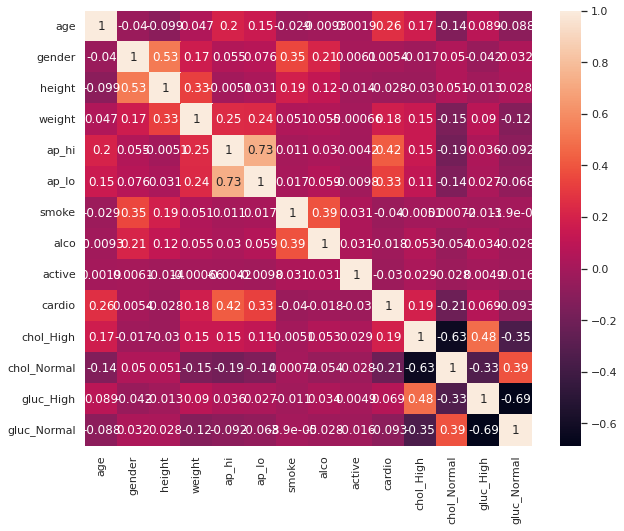

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(cardio_train.corr(),annot = True)

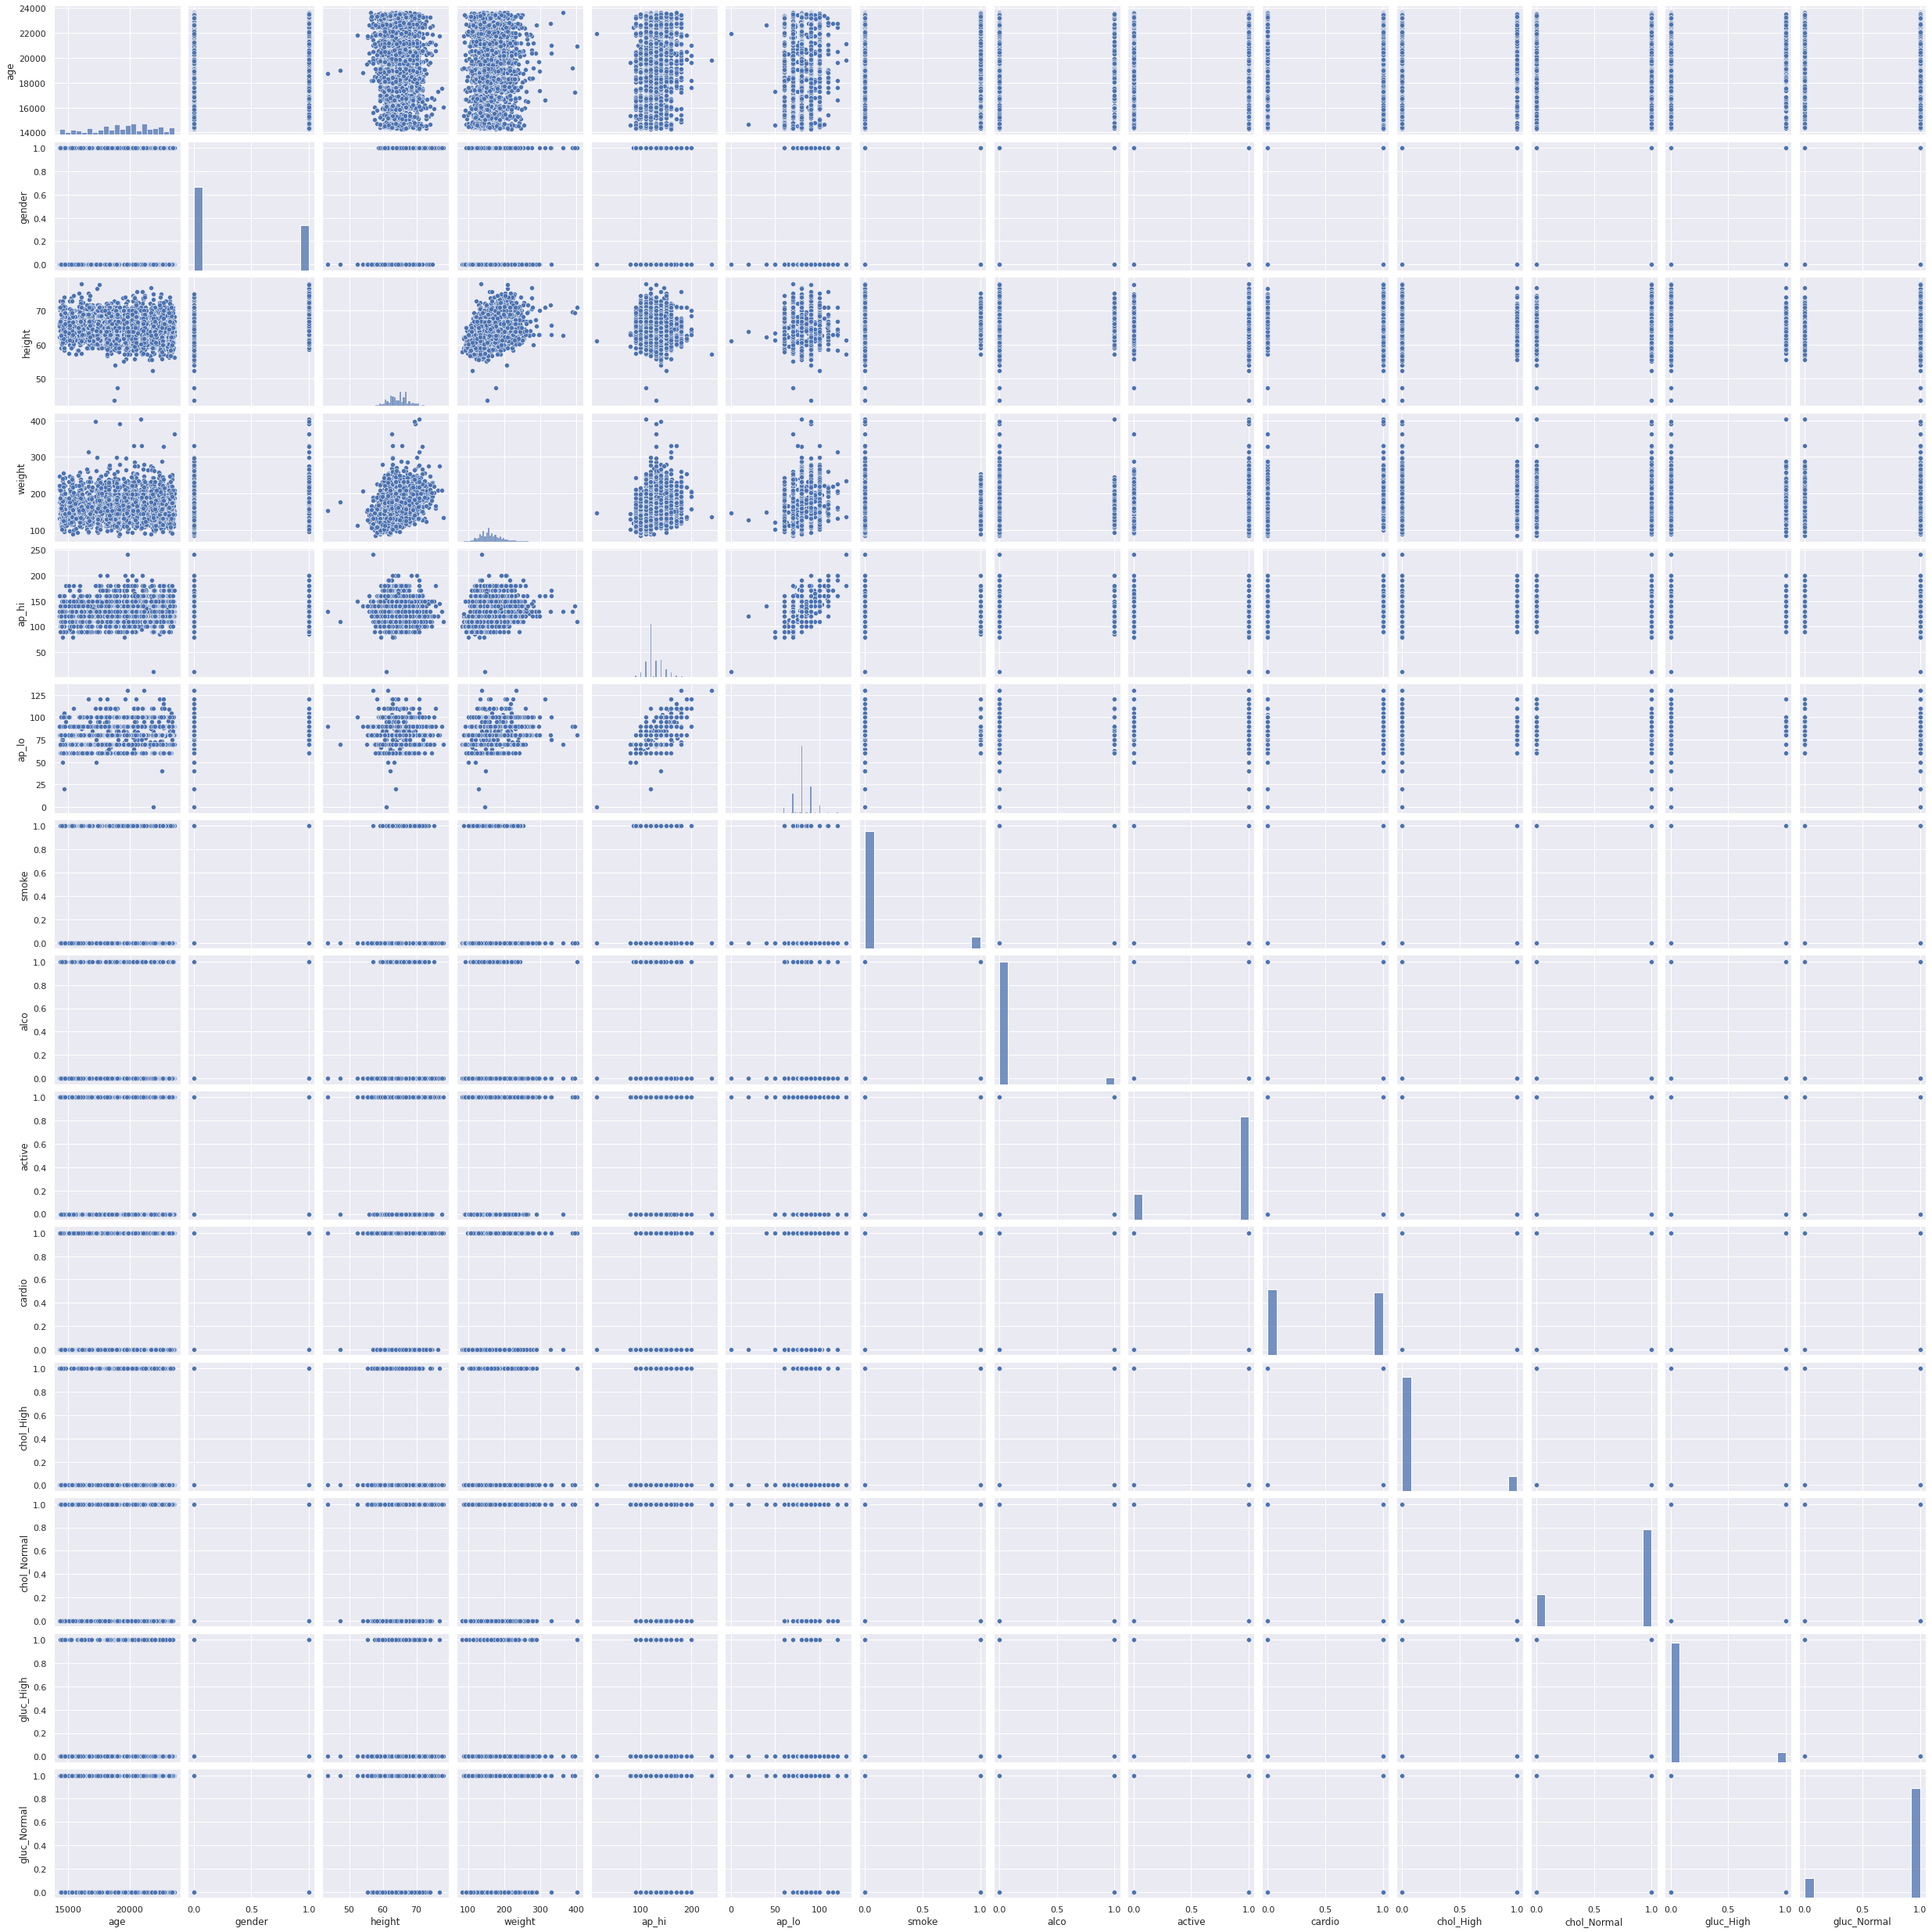

In [ ]:
sns.pairplot(data = cardio_train)

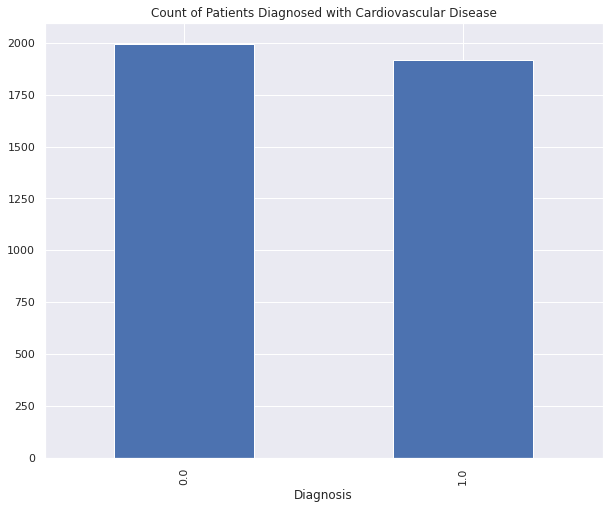

In [ ]:
c_count = cardio_train['cardio'].value_counts()
plot1 = c_count.plot(kind = 'bar', title = 'Count of Patients Diagnosed with Cardiovascular Disease')
plt.xlabel('Diagnosis')
plt.show()

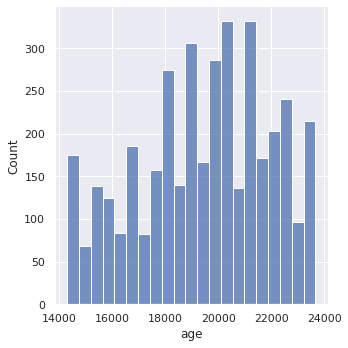

In [ ]:
sns.displot(data = cardio_train, x = 'age')

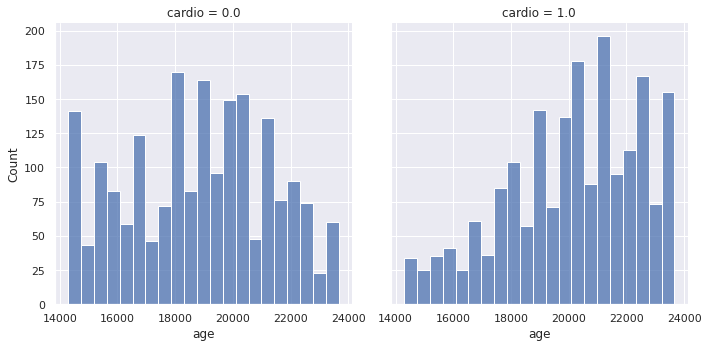

In [ ]:
sns.displot(data = cardio_train, x = 'age', col = 'cardio') 

In [ ]:
cardio_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          3913 non-null   float64
 1   gender       3913 non-null   float64
 2   height       3913 non-null   float64
 3   weight       3913 non-null   float64
 4   ap_hi        3913 non-null   float64
 5   ap_lo        3913 non-null   float64
 6   smoke        3913 non-null   float64
 7   alco         3913 non-null   float64
 8   active       3913 non-null   float64
 9   cardio       3913 non-null   float64
 10  chol_High    3913 non-null   uint8  
 11  chol_Normal  3913 non-null   uint8  
 12  gluc_High    3913 non-null   uint8  
 13  gluc_Normal  3913 non-null   uint8  
dtypes: float64(10), uint8(4)
memory usage: 511.6 KB


## Unsupervised Learning- K-Means Clustering Analysis

In [ ]:
cols = ['gender','smoke','alco','active', 'chol_Normal','gluc_High','gluc_Normal','chol_High', 'cardio']
train_keep = cardio_train.drop(cols, axis = 1)
scaler = MinMaxScaler()
scaler.fit(train_keep)
train_scaled_0 = scaler.transform(train_keep)
train_scaled = pd.DataFrame(data = train_scaled_0, columns = train_keep.columns)
train_scaled.head(3)
print(train_scaled.shape)
print(cardio_train)
print(train_scaled)

(3913, 5)
          age  gender  height  ...  chol_Normal  gluc_High  gluc_Normal
0     17363.0     0.0   67.72  ...            1          0            1
1     21200.0     0.0   66.14  ...            1          0            1
2     17286.0     0.0   65.75  ...            1          0            1
3     15822.0     0.0   61.81  ...            1          0            1
4     20458.0     0.0   61.42  ...            1          0            1
...       ...     ...     ...  ...          ...        ...          ...
3995  23279.0     0.0   66.93  ...            1          0            1
3996  20450.0     0.0   64.96  ...            1          0            1
3997  22085.0     1.0   66.93  ...            1          0            1
3998  23212.0     0.0   64.57  ...            1          0            1
3999  18983.0     1.0   68.90  ...            0          0            1

[3913 rows x 14 columns]
           age    height    weight     ap_hi     ap_lo
0     0.327537  0.701314  0.351706  0.427313 

Text(0, 0.5, 'WCSS')

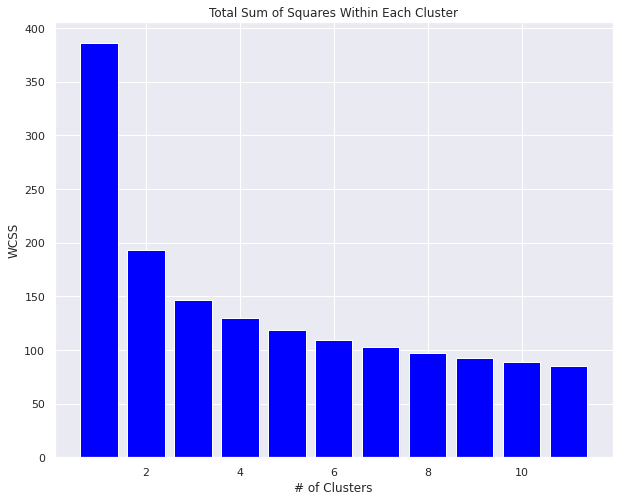

In [ ]:
wcss = []
for i in range(1,12):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 3)
  kmeans.fit(train_scaled)
  wcss.append(kmeans.inertia_)
plt.bar(range(1,12), wcss, color = 'blue')
plt.title('Total Sum of Squares Within Each Cluster')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')

In [ ]:
kmeans_4 = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 1000, random_state = 3)
kmeans_4.fit(train_scaled)
centroids = kmeans_4.cluster_centers_
label = kmeans_4.fit_predict(train_scaled)

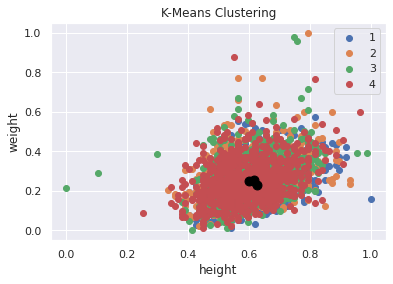

In [ ]:
plt.figure(figsize = (6,4))
num_clusters = np.unique(label)
for i in num_clusters:
  plt.scatter(train_scaled.iloc[label == i, 1], train_scaled.iloc[label == i, 2], label = i)
plt.scatter(centroids[:,1], centroids[:,2], s = 80, color = 'black')
plt.title("K-Means Clustering")
plt.xlabel('height')
plt.ylabel('weight')
plt.legend([1, 2, 3,4])
plt.show()

## Supervised Learning

**Supervised Learning:**
- Logistic Regression
- CART Decision Tree Model
- Random Forest Model
- Neural Networks

**Logistic Regression:**

In [ ]:
cardio_train.head(1)

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,chol_High,chol_Normal,gluc_High,gluc_Normal
0,17363.0,0.0,67.72,196.21,110.0,70.0,0.0,1.0,0.0,0.0,0,1,0,1


In [ ]:
cardio_test.head(1)

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,chol_High,chol_Normal,gluc_High,gluc_Normal
id,,,,,,,,,,,,,
0,16036.0,0.0,64.96,275.58,160.0,100.0,0.0,0.0,0.0,0,1,0,0


In [ ]:
cardio_train['cardio'].value_counts()

0.0    1995
1.0    1918
Name: cardio, dtype: int64

In [ ]:
cardio_train['cardio'].value_counts()[1]/(len(cardio_train)*1.0)

0.49016100178890876

In [ ]:
X = cardio_train.drop('cardio', axis = 1)
y = cardio_train['cardio']
Train, Test = train_test_split(cardio_train, test_size=0.25, random_state=25)

In [ ]:
#Generate the formula with all variable names since ~ . doesn't work here 
all_columns1 = "+".join(list(set(Train.columns)-set(["cardio"])) ) 
#and run logistic regression 
logistic_Car_mod1 = smf.glm(formula='cardio ~ '+all_columns1, data=Train,family=sm.families.Binomial()) 
res1 = logistic_Car_mod1.fit() 
print(res1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 cardio   No. Observations:                 2934
Model:                            GLM   Df Residuals:                     2920
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1631.6
Date:                Mon, 20 Dec 2021   Deviance:                       3263.2
Time:                        06:38:21   Pearson chi2:                 3.25e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -10.0289      1.201     -8.350      

Now let's construct a confusion matrix for the training data.

In [ ]:
logistic_Car_mod1_pred = res1.predict(Train)
logistic_Car_mod1_labels = np.zeros(len(Train))
logistic_Car_mod1_labels[logistic_Car_mod1_pred >0.5] = 1
cm_train = confusion_matrix(Train['cardio'], logistic_Car_mod1_labels)
cm_train

array([[1180,  322],
       [ 476,  956]])

Text(0.5, 48.5, 'Predicted Label')

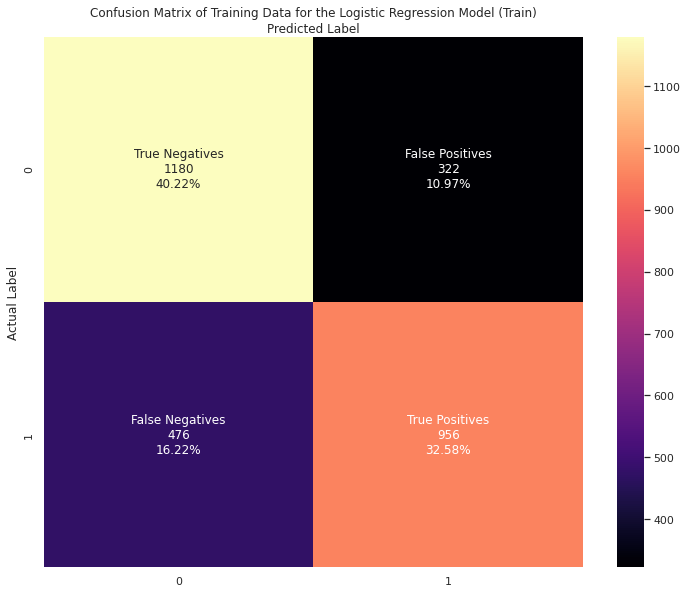

In [ ]:
fig, ax = plt.subplots()

group_names = ['True Negatives','False Positives','False Negatives','True Positives']
group_counts = ["{0:0.0f}".format(value) for value in cm_train.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm_train.flatten()/np.sum(cm_train)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm_train, annot=labels, fmt='', cmap='magma')
plt.tight_layout()
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix of Training Data for the Logistic Regression Model (Train)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

Create a function that computes the scores for our classification model

In [ ]:
def get_metrics(cm, ytrue, ypred):
  sensitivity = round(cm[1,1]/(cm[1,0] + cm[1,1]),3) #sensitivity = true positives / (true positives + false negatives)
  specificity = round(cm[0,0]/(cm[0,0]+cm[0,1]),3) #specificity = true negatives / (true negatives + false positives)
  misclassification = round((cm[0,1] + cm[1,0])/ np.sum(cm),2)
  report = classification_report(ytrue, ypred)
  print(f'Sensitivity rate: {sensitivity}')
  print(f'Specificity rate: {specificity}')
  print(f'Misclassification rate {misclassification}\n')
  print(report)

In [ ]:
get_metrics(cm = cm_train, ytrue = Train['cardio'], ypred = logistic_Car_mod1_labels)

Sensitivity rate: 0.668
Specificity rate: 0.786
Misclassification rate 0.27

              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75      1502
         1.0       0.75      0.67      0.71      1432

    accuracy                           0.73      2934
   macro avg       0.73      0.73      0.73      2934
weighted avg       0.73      0.73      0.73      2934



Now lets run the same the Generalized Linear Model for the testing data (sm.families.Binomial()).

In [ ]:
all_columns2 = "+".join(list(set(Test.columns)-set(["cardio"])) ) 
logistic_Car_mod2 = smf.glm(formula='cardio~ '+all_columns2, data=Test,family=sm.families.Binomial()) 
res2 = logistic_Car_mod2.fit() 
print(res2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 cardio   No. Observations:                  979
Model:                            GLM   Df Residuals:                      965
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -542.63
Date:                Mon, 20 Dec 2021   Deviance:                       1085.3
Time:                        06:38:22   Pearson chi2:                     991.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -9.7486      2.270     -4.294      

Construct a Confusion Matrix for testing data.

In [ ]:
logistic_Car_mod2_pred = res2.predict(Test)
logistic_Car_mod2_labels = np.zeros(len(Test))
logistic_Car_mod2_labels[logistic_Car_mod2_pred >0.5] = 1
cm_test = confusion_matrix(Test['cardio'], logistic_Car_mod2_labels)
cm_test

array([[378, 115],
       [165, 321]])

Text(0.5, 48.5, 'Predicted Label')

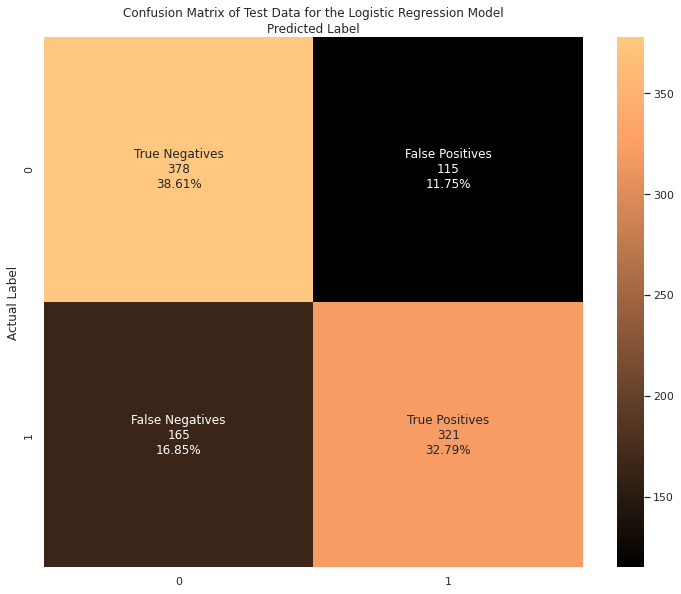

In [ ]:
fig, ax = plt.subplots()

group_names = ['True Negatives','False Positives','False Negatives','True Positives']
group_counts = ["{0:0.0f}".format(value) for value in cm_test.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm_test.flatten()/np.sum(cm_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm_test, annot=labels, fmt='', cmap='copper')
plt.tight_layout()
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix of Test Data for the Logistic Regression Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [ ]:
get_metrics(cm = cm_test, ytrue = Test['cardio'], ypred = logistic_Car_mod2_labels)

Sensitivity rate: 0.66
Specificity rate: 0.767
Misclassification rate 0.29

              precision    recall  f1-score   support

         0.0       0.70      0.77      0.73       493
         1.0       0.74      0.66      0.70       486

    accuracy                           0.71       979
   macro avg       0.72      0.71      0.71       979
weighted avg       0.72      0.71      0.71       979



Construct the ROC curve for the Confusion Matrices

The AUC curve for Logistic Regression for the training data...

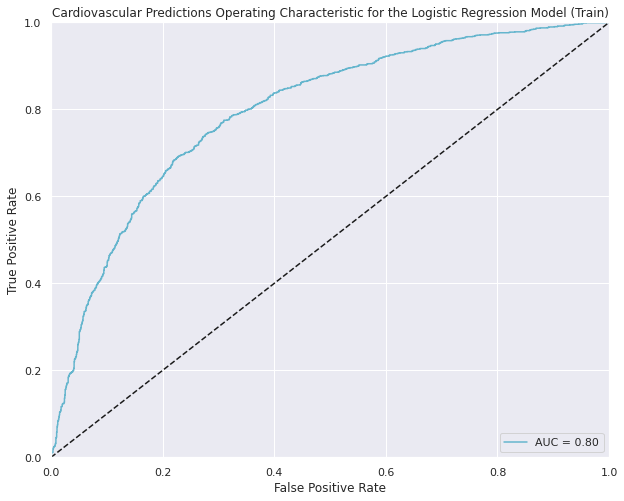

In [ ]:
fpr, tpr, threshold = roc_curve((Train['cardio'] == 1), res1.predict(Train))
roc_auc = auc(fpr, tpr)
plt.title('Cardiovascular Predictions Operating Characteristic for the Logistic Regression Model (Train)')
plt.plot(fpr, tpr, 'c', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The AUC curve for Logistic Regression for the testing data...

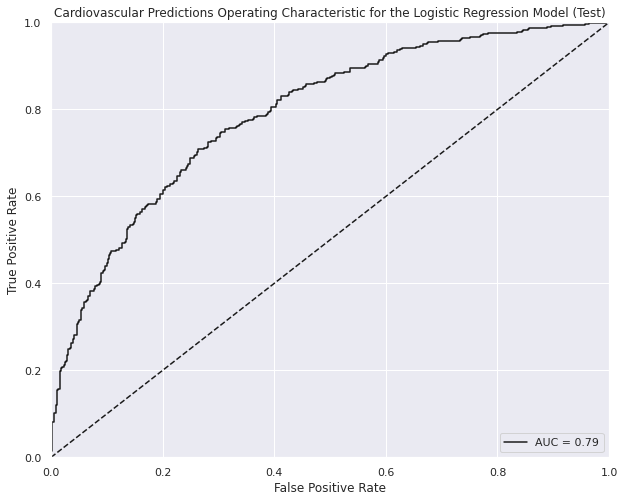

In [ ]:
fpr, tpr, threshold = roc_curve((Test['cardio'] == 1), res2.predict(Test))
roc_auc = auc(fpr, tpr)
plt.title('Cardiovascular Predictions Operating Characteristic for the Logistic Regression Model (Test)')
plt.plot(fpr, tpr, 'k', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**CART Model:**

In [ ]:
np.random.seed(45)
Train, Test = train_test_split(cardio_train, test_size = 0.25, random_state = 25)
val, Test2 = train_test_split(Test, test_size = 0.5)
X_Train = Train.drop(columns = ['cardio']).values
y_Train = Train['cardio'].values
X_val = val.drop(columns = ['cardio']).values
y_val = val['cardio'].values
X_Test = Test2.drop(columns = ['cardio']).values
y_Test = Test2['cardio'].values

Let's begin by doing a CART model as follows...

In [ ]:
import pydot
from IPython.display import Image
def print_tree(estimator, features, class_names=None, filled=True):
  tree = estimator
  names = features
  color = filled
  classn = class_names
  dot_data = StringIO()
  export_graphviz(estimator, out_file=dot_data,feature_names=features,class_names=classn, filled=filled)
  graph = pydot.graph_from_dot_data(dot_data.getvalue())
  return(graph)

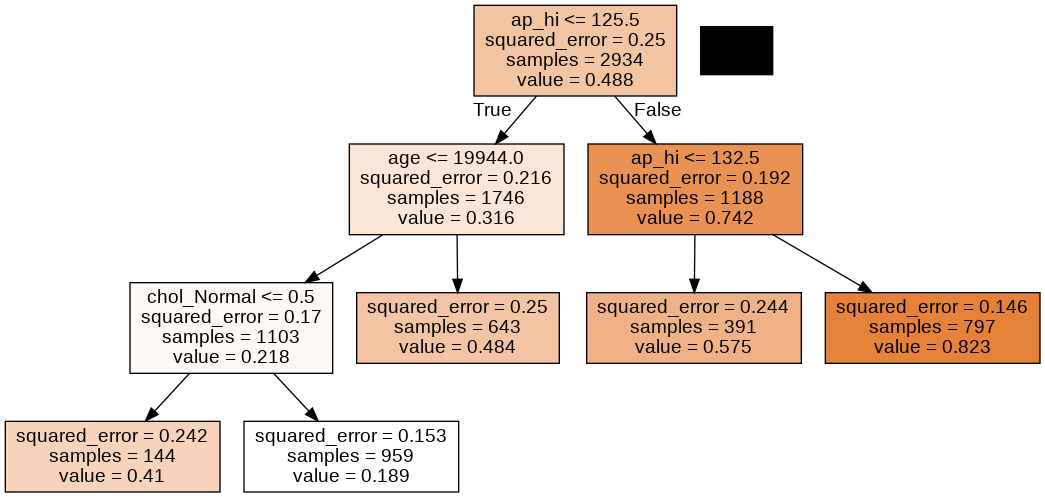

In [ ]:
df_tree = DecisionTreeRegressor(min_samples_split=5,min_impurity_decrease=0.002)
df_tree.fit(X_Train, y_Train)
graph, = print_tree(df_tree, features= Train.drop(columns = ['cardio']).columns)
Image(graph.create_png())

In [ ]:
df_tree_preds = df_tree.predict(X_Test)

In [ ]:
tree_cart_pred = confusion_matrix(y_Test, (df_tree_preds > 0.5))
tree_cart_pred

array([[193,  42],
       [117, 138]])

In [ ]:
preds_bins = df_tree_preds > 0.5
table = pd.DataFrame({'True':Test2['cardio'],'pred':preds_bins}) 
table.groupby(['True','pred']).size().unstack('True')

True,0.0,1.0
pred,,
False,193,117
True,42,138


Text(0.5, 48.5, 'Predicted Label')

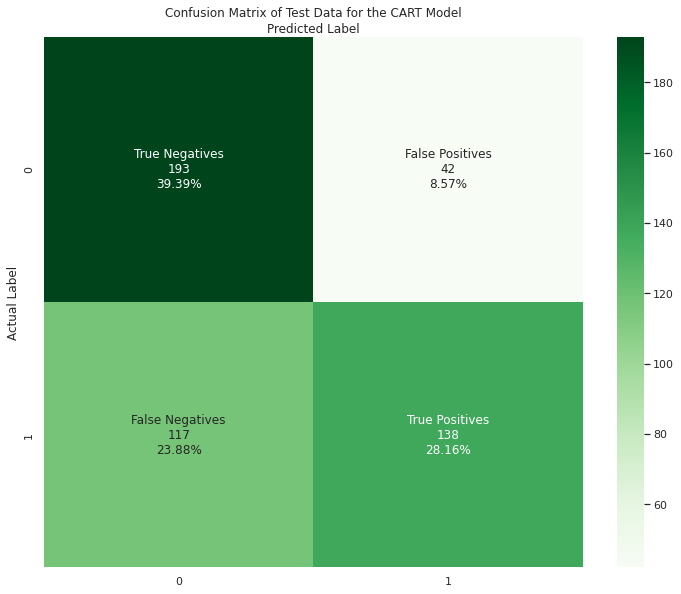

In [ ]:
fig, ax = plt.subplots()

group_names = ['True Negatives','False Positives','False Negatives','True Positives']
group_counts = ["{0:0.0f}".format(value) for value in tree_cart_pred.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in tree_cart_pred.flatten()/np.sum(tree_cart_pred)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(tree_cart_pred, annot=labels, fmt='', cmap='Greens')
plt.tight_layout()
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix of Test Data for the CART Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [ ]:
get_metrics(tree_cart_pred, ytrue = y_Test, ypred = (df_tree_preds > 0.5))

Sensitivity rate: 0.541
Specificity rate: 0.821
Misclassification rate 0.32

              precision    recall  f1-score   support

         0.0       0.62      0.82      0.71       235
         1.0       0.77      0.54      0.63       255

    accuracy                           0.68       490
   macro avg       0.69      0.68      0.67       490
weighted avg       0.70      0.68      0.67       490



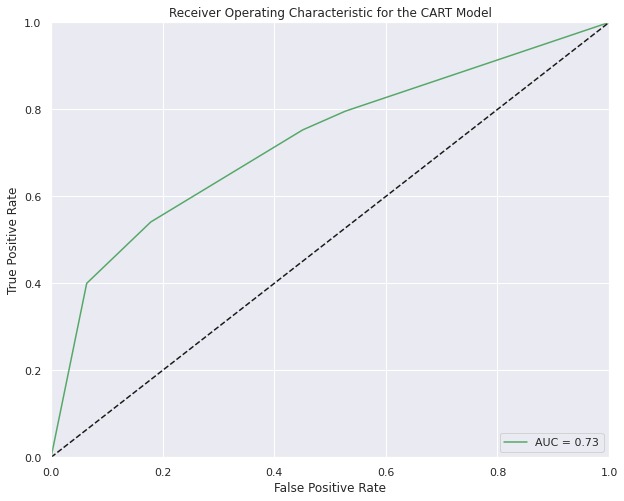

In [ ]:
fpr, tpr, threshold = roc_curve(y_Test, df_tree_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic for the CART Model')
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Random Forest Model:**

In [ ]:
np.random.seed(45)
Train, Test = train_test_split(cardio_train, test_size = 0.25, random_state= 25)
val, Test = train_test_split(Test, test_size = 0.5)
X_Train = Train.drop(columns = ['cardio']).values
y_Train = Train['cardio'].values
X_val = val.drop(columns = ['cardio']).values
y_val = val['cardio'].values
X_Test = Test.drop(columns = ['cardio']).values
y_Test = Test['cardio'].values

In [ ]:
df_rf = RandomForestRegressor(max_features=6, n_estimators=2000, random_state=1)
df_rf.fit(X_Train, y_Train)

RandomForestRegressor(max_features=6, n_estimators=2000, random_state=1)

In [ ]:
df_rf_preds = df_rf.predict(X_Test)
#df_rf_preds

In [ ]:
rf_preds = confusion_matrix(y_Test, (df_rf_preds > 0.5))
rf_preds

array([[173,  62],
       [ 99, 156]])

Text(0.5, 48.5, 'Predicted Label')

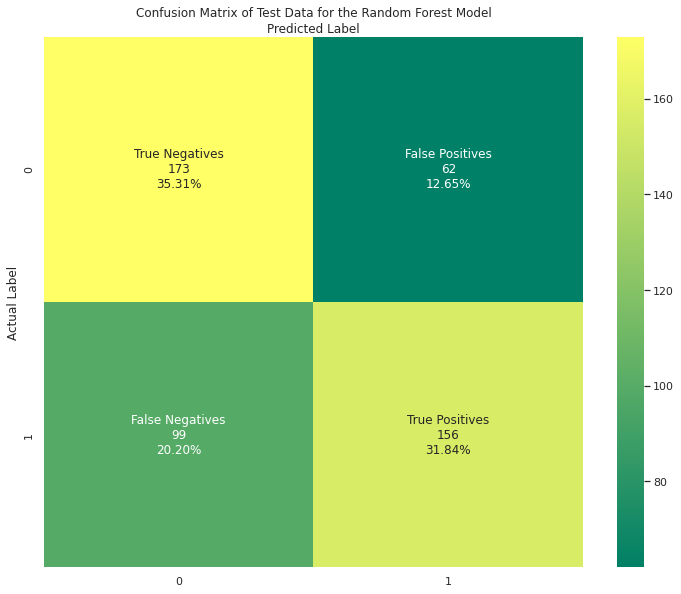

In [ ]:
fig, ax = plt.subplots()

group_names = ['True Negatives','False Positives','False Negatives','True Positives']
group_counts = ["{0:0.0f}".format(value) for value in rf_preds.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in rf_preds.flatten()/np.sum(rf_preds)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(rf_preds, annot=labels, fmt='', cmap='summer')
plt.tight_layout()
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix of Test Data for the Random Forest Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [ ]:
get_metrics(cm = rf_preds, ytrue = y_Test, ypred = (df_rf_preds > 0.5))

Sensitivity rate: 0.612
Specificity rate: 0.736
Misclassification rate 0.33

              precision    recall  f1-score   support

         0.0       0.64      0.74      0.68       235
         1.0       0.72      0.61      0.66       255

    accuracy                           0.67       490
   macro avg       0.68      0.67      0.67       490
weighted avg       0.68      0.67      0.67       490



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  after removing the cwd from sys.path.


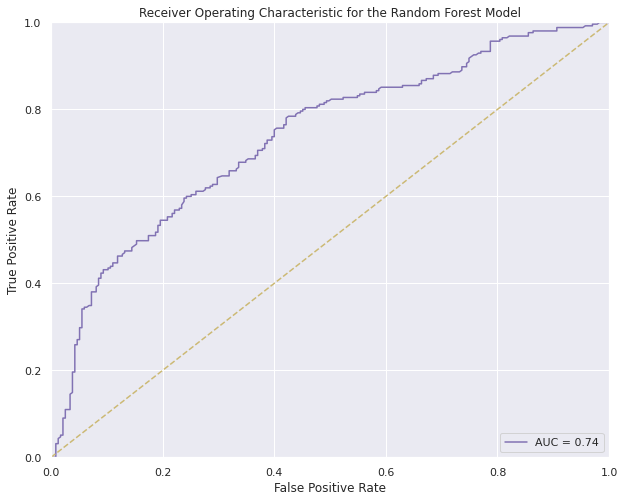

In [ ]:
fpr, tpr, threshold = roc_curve(y_Test, df_rf_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic for the Random Forest Model')
plt.plot(fpr, tpr, 'M', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'y--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Boosted Model:**

In [ ]:
np.random.seed(45)
Train, Test = train_test_split(cardio_train, test_size = 0.25, random_state= 25)
val, Test = train_test_split(Test, test_size = 0.5)
X_Train = Train.drop(columns = ['cardio']).values
y_Train = Train['cardio'].values
X_val = val.drop(columns = ['cardio']).values
y_val = val['cardio'].values
X_Test = Test.drop(columns = ['cardio']).values
y_Test = Test['cardio'].values

In [ ]:
df_boost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.001,random_state=1)
df_boost.fit(X_Train, y_Train)

GradientBoostingRegressor(learning_rate=0.001, n_estimators=1000,
                          random_state=1)

In [ ]:
df_boost_preds = df_boost.predict(X_Test)

In [ ]:
boost_pred = confusion_matrix(y_Test, (df_boost_preds > 0.5))
boost_pred

array([[187,  48],
       [101, 154]])

Text(0.5, 48.5, 'Predicted Label')

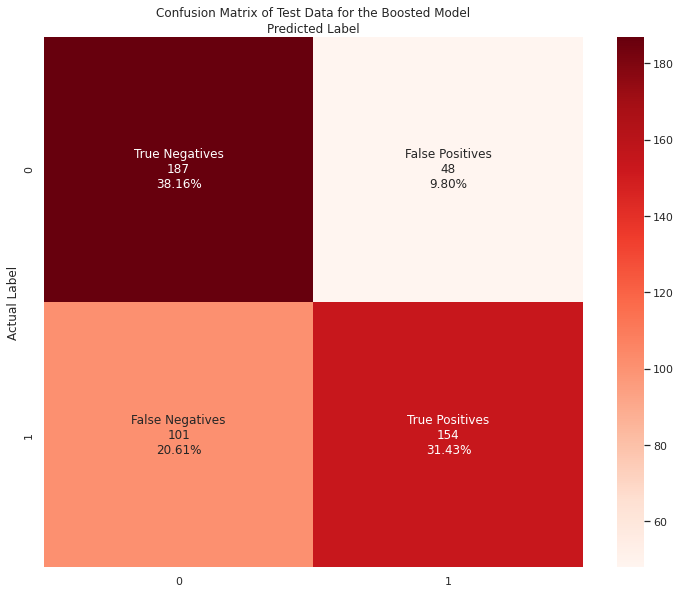

In [ ]:
fig, ax = plt.subplots()

group_names = ['True Negatives','False Positives','False Negatives','True Positives']
group_counts = ["{0:0.0f}".format(value) for value in boost_pred.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in boost_pred.flatten()/np.sum(boost_pred)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(boost_pred, annot=labels, fmt='', cmap='Reds')
plt.tight_layout()
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix of Test Data for the Boosted Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [ ]:
get_metrics(cm = boost_pred, ytrue = y_Test, ypred = (df_boost_preds > 0.5))

Sensitivity rate: 0.604
Specificity rate: 0.796
Misclassification rate 0.3

              precision    recall  f1-score   support

         0.0       0.65      0.80      0.72       235
         1.0       0.76      0.60      0.67       255

    accuracy                           0.70       490
   macro avg       0.71      0.70      0.69       490
weighted avg       0.71      0.70      0.69       490



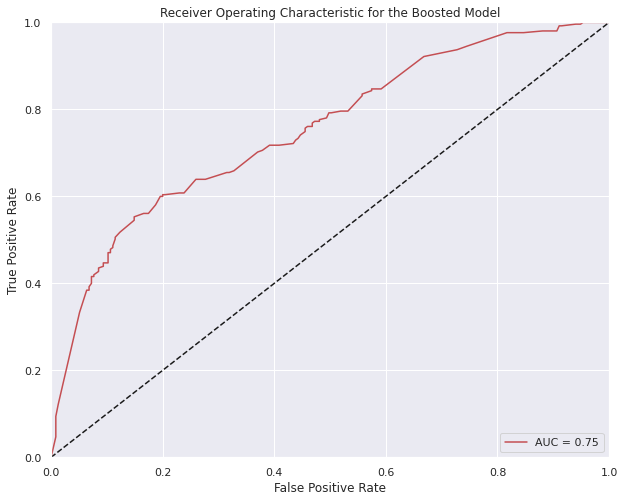

In [ ]:
fpr, tpr, threshold = roc_curve(y_Test, df_boost_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic for the Boosted Model')
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Neural Nework Model:**

In [ ]:
np.random.seed(45)
Train, Test = train_test_split(cardio_train, test_size = 0.25, random_state= 25)
val, Test = train_test_split(Test, test_size = 0.5)
X_Train = Train.drop(columns = ['cardio']).values
y_Train = Train['cardio'].values
X_val = val.drop(columns = ['cardio']).values
y_val = val['cardio'].values
X_Test = Test.drop(columns = ['cardio']).values
y_Test = Test['cardio'].values

In [ ]:
cardio_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          3913 non-null   float64
 1   gender       3913 non-null   float64
 2   height       3913 non-null   float64
 3   weight       3913 non-null   float64
 4   ap_hi        3913 non-null   float64
 5   ap_lo        3913 non-null   float64
 6   smoke        3913 non-null   float64
 7   alco         3913 non-null   float64
 8   active       3913 non-null   float64
 9   cardio       3913 non-null   float64
 10  chol_High    3913 non-null   uint8  
 11  chol_Normal  3913 non-null   uint8  
 12  gluc_High    3913 non-null   uint8  
 13  gluc_Normal  3913 non-null   uint8  
dtypes: float64(10), uint8(4)
memory usage: 351.6 KB


In [ ]:
X_Train.shape

(2934, 13)

In [ ]:
inputs = keras.Input(shape=(13,))
x = layers.Dense(6, activation="relu", name="dense_1")(inputs)
x = layers.Dense(6, activation="relu", name="dense_2")(x)
x = layers.Dense(6, activation="sigmoid", name="dense_3")(x)
outputs = layers.Dense(1, activation="sigmoid", name="predictions")(x)
df_nnet = keras.Model(inputs=inputs, outputs=outputs)
df_nnet.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  # Loss function to minimize
  loss='binary_crossentropy',
  # List of metrics to monitor
  metrics=['accuracy'],
)

In [ ]:
history = df_nnet.fit(
  X_Train,
  y_Train,
  batch_size=20,
  epochs=200
)

Epoch 1/200
147/147 [==============================] - 1s 2ms/step - loss: 0.7223 - accuracy: 0.5119
Epoch 2/200
147/147 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5119
Epoch 3/200
147/147 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5119
Epoch 4/200
147/147 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5119
Epoch 5/200
147/147 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5119
Epoch 6/200
147/147 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5119
Epoch 7/200
147/147 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5119
Epoch 8/200
147/147 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5119
Epoch 9/200
147/147 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5119
Epoch 10/200
147/147 [==============================] - 0s 2ms/step - loss: 0.6930 - accura

In [ ]:
df_nnet_preds = df_nnet.predict(X_Test)

In [ ]:
df_nnet_pred = confusion_matrix(y_Test, (df_nnet_preds > 0.5))
df_nnet_pred

array([[235,   0],
       [255,   0]])

Text(0.5, 15.0, 'Predicted Label')

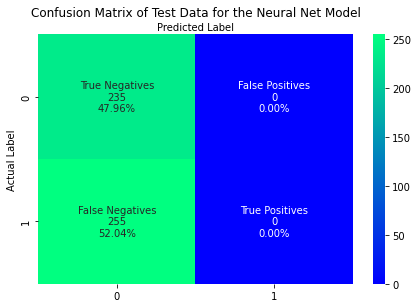

In [ ]:
fig, ax = plt.subplots()

group_names = ['True Negatives','False Positives','False Negatives','True Positives']
group_counts = ["{0:0.0f}".format(value) for value in df_nnet_pred.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in df_nnet_pred.flatten()/np.sum(df_nnet_pred)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(df_nnet_pred, annot=labels, fmt='', cmap='winter')
plt.tight_layout()
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix of Test Data for the Neural Net Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [ ]:
get_metrics(cm = df_nnet_pred, ytrue = y_Test, ypred = (df_nnet_preds > 0.5))

Sensitivity rate: 0.0
Specificity rate: 1.0
Misclassification rate 0.52

              precision    recall  f1-score   support

         0.0       0.48      1.00      0.65       235
         1.0       0.00      0.00      0.00       255

    accuracy                           0.48       490
   macro avg       0.24      0.50      0.32       490
weighted avg       0.23      0.48      0.31       490



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


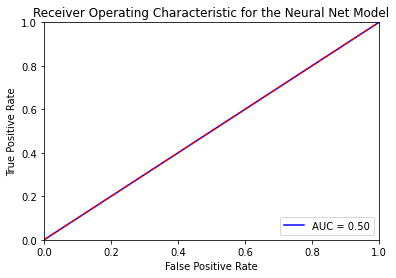

In [ ]:
fpr, tpr, threshold = roc_curve(y_Test, df_nnet_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic for the Neural Net Model')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Data Submission Assessment of Varying Models:

In [ ]:
cardio_test = pd.read_csv('656FinalProject/test.csv', index_col = 0)

cardio_test['cholesterol']=cardio_test['cholesterol'].map({1:"Normal", 2:"Ab_Normal", 3:'High'})

cardio_test['gluc']=cardio_test['gluc'].map({1:"Normal", 2:"Ab_Normal", 3:'High'})

cardio_test['gender']=cardio_test['gender']-1

# Creating Dummy Variable for Cholestrol
d1=pd.get_dummies(cardio_test['cholesterol'],prefix='chol',drop_first=True)

# Creating Dummy Variable for Glucose
d2=pd.get_dummies(cardio_test['gluc'],prefix='gluc',drop_first=True)

cardio_test=pd.concat([cardio_test,d1,d2],axis=1)

cardio_test.drop(['cholesterol','gluc'],axis=1,inplace=True)

In [ ]:
test_preds = res2.predict(cardio_test)
test_labels = np.zeros(len(cardio_test))
test_labels[test_preds >0.5] = 1

In [ ]:
cardio_test['cardio'] = test_labels
cardio_test

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,chol_High,chol_Normal,gluc_High,gluc_Normal,cardio
id,,,,,,,,,,,,,,
0,16036,0,165,125.0,160,100,0,0,0,0,1,0,0,0.0
1,17004,0,165,120.0,100,75,0,0,1,0,0,0,1,0.0
2,17547,0,151,58.0,110,60,0,0,1,0,0,0,1,0.0
3,20562,0,172,70.0,130,90,0,0,1,0,1,0,1,0.0
4,18759,0,168,64.0,110,80,0,0,1,0,1,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,19542,1,165,68.0,150,90,0,0,1,0,1,0,1,0.0
996,21153,0,148,79.0,140,80,0,0,1,0,0,0,0,0.0
997,19673,0,170,82.0,120,80,0,0,0,0,1,0,1,0.0


In [ ]:
cardio_test_2 = pd.read_csv('656FinalProject/test.csv')
submission = pd.DataFrame(cardio_test['cardio'])
submission.to_csv('submission.csv')
files.download('submission.csv')
submission

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,cardio
id,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
995,0.0
996,0.0
997,0.0
